#### 1. Import the Wine dataset

In [1]:
import pandas as pd
wine = pd.read_csv("data/wine.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 2. Do an exploratory analysis and pick at least two variables that are measured differently or have a widely different range of values.
We are going to use these variables to try to predict the wine quality.
    - Explain why you think scaling will have an impact on these variables.
    - Report any interesting observations that resulted from your EDA

In [3]:
# Dataset descriptive stats
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#look at how different features correlate with others
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### 3. Use Train Test Split to split your data.
#### - Create a Multi-Linear Regression and fit it with the UNSCALED x_train & y_train data.
#### - Call predict using your fitted model on your x_test data.
#### - Plot the residuals of your y_test and y_pred
#### - Observe the Summary Statistics.  
TIP: In order to maintain uniformity of your splits specify random_state

In [5]:
import numpy as np
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
df = wine[['residual sugar', 'alcohol']]
y = wine[['density']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=5)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(1071, 2) (1071, 1)
(528, 2) (528, 1)


Score: 0.413774570357
Score: 0.413774570357


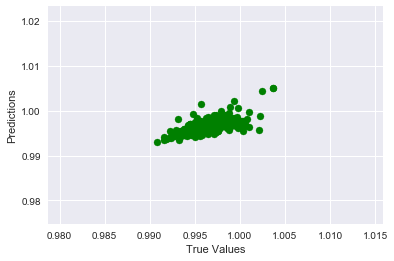

In [9]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
#call predict on model 
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, c="g")
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", r2_score(y_test, predictions)  ## how well predictions do against true
print "Score:", model.score(X_test, y_test) ## does exactly the same thing


#### 4. Scale your two+ selected features using a Min-Max Scaler.

In [11]:
# importing the min-max scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# setting sclaer
MMS = MinMaxScaler()

# fit/transforming the data using the scaler
x_scaled = MMS.fit_transform(df)


In [13]:
x_fit = MMS.fit(df)

#### 5. Use Train Test Split to split your data.
#### - Create a Multi-Linear Regression and fit it with the SCALED x_train & y_train data.
#### - Call predict using your fitted model on your x_test data.
#### - Plot the residuals of your y_test and y_pred
#### - Observe the Summary Statistics.  

In [14]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled, y, random_state = 51)

0.454519557276


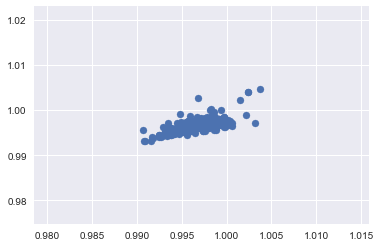

In [15]:
LR2 = linear_model.LinearRegression()
# fit model
LR2f = LR2.fit(x_train2, y_train2)
# use model to predict y using x
y_pred2_2 = LR2f.predict(x_test2)
# compare y true and y pred
print r2_score(y_test2, y_pred2_2)
plt.scatter(x = y_test2, y = y_pred2_2)

#### 6. Repeat Step 4 using standardization to scale your data. 

In [16]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_scale2 = SS.fit_transform(df)

#### 7. Repeat Step 5 using standardization to scale your data. 

In [17]:
# tts standardized data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_scale2, y, random_state = 51)

0.454519557276


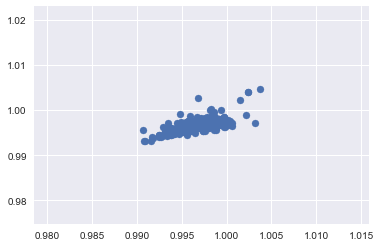

In [18]:
LR3 = linear_model.LinearRegression()
# fit lr model
LR3f = LR3.fit(x_train3, y_train3)
# use fit lr model to predict y using x test
y_pred3_2 = LR3f.predict(x_test3)
# score model comparing y true vs y pred
print r2_score(y_test3, y_pred3_2)
plt.scatter(x = y_test3, y = y_pred3_2)

### Sebastian Raschka's example

In [19]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [20]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [25]:
std_scale = StandardScaler().fit(df[['Alcohol', 'Malic acid']]) #find parameters of the data
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']]) #apply parameters to the data

# >>>
alc_fit_transform = SS.fit_transform(df[['Alcohol', 'Malic acid']])

minmax_scale = MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])



In [26]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))



print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))


Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [27]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))


Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


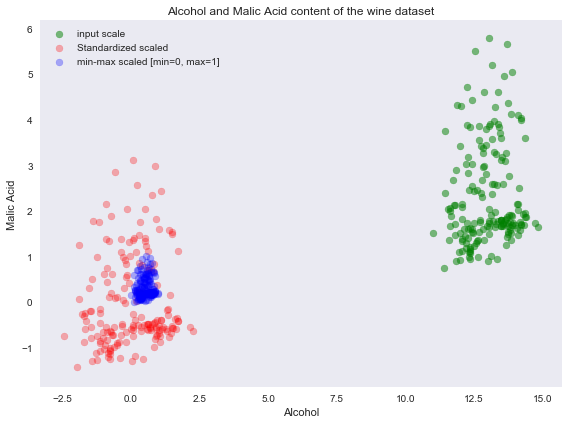

In [24]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized scaled', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

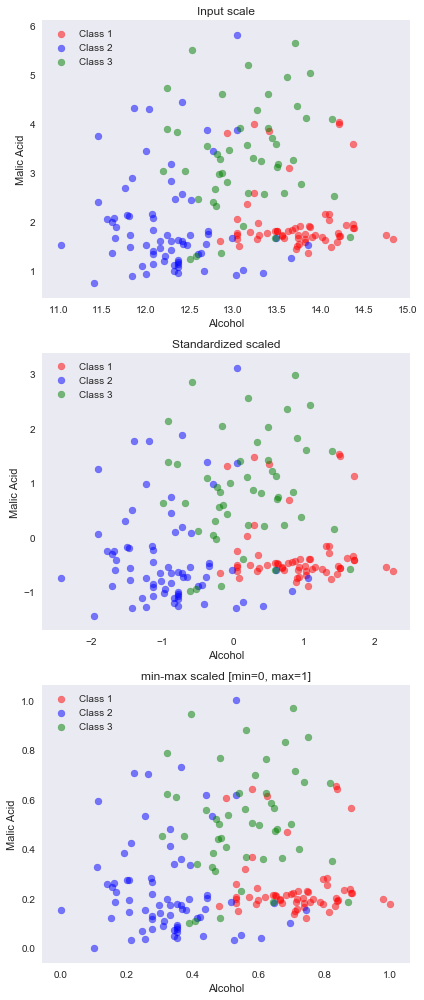

In [28]:
#focus on the scales for these plots
fig, ax = plt.subplots(3, figsize=(6,14))


for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized scaled',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()